# Analysis and Visualization of Complex Agro-Environmental Data
---
## Cluster Analysis - Agglomerative hierarchical clustering

Hierarchical agglomerative cluster analysis is one of the most widely used clustering approaches to group objects based on their dissimilarities. It is based on grouping successively objects and previously defined clusters. The aim of this approach is toward grouping data into a tree of clusters called dendrograms, which graphically represents the hierarchical relationship between the underlying clusters.

In `python` the method is implemented in the `dendrogram()` and `linkage()` functions of the `scipy` module, and in the `AgglomerativeClustering()` function of the `sklearn.cluster` module.

To run the analysis you first need to import necessary modules and functions:

In [1]:
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics
from scipy.cluster.hierarchy import dendrogram, linkage # to run the linkage method and create dendrograms
from sklearn.cluster import AgglomerativeClustering # to perform agglomerative clustering

Create a 2D DataFrame, with 2 variables.

In [2]:
df=pd.DataFrame({"X": [12,15,18,10,8,9,12,20,29,16,24,9,27], "Y": [6,16,17,8,7,6,9,18,8,14,6,7,9]})
df

,X,Y
0,12,6
1,15,16
2,18,17
3,10,8
4,8,7
5,9,6
6,12,9
7,20,18
8,29,8
9,16,14


Plot the data. It is evident that there are three groups of objects that are expected to be defined.

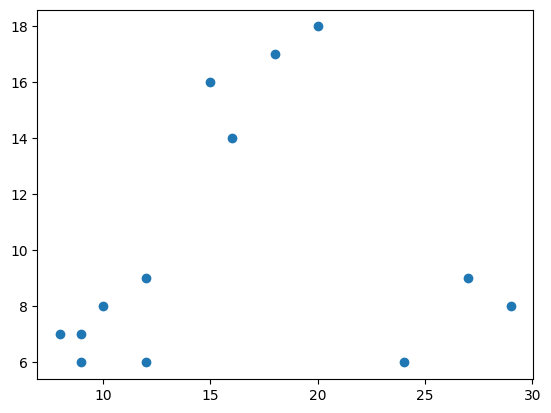

In [3]:
plt.scatter("X","Y", data=df)
plt.show()

Create dendrograms using `Scipy` Check the `linkage()` and `dendrogram()` functions help files.

In [4]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.

    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.

    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.

    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of

In [5]:
help(dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
    Plot the hierarchical clustering as a dendrogram.

    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children. The top of the U-link indicates a
    cluster merge. The two legs of the U-link indicate which clusters
    were merged. The length of the two legs of the U-link represents
    the distance between the child clusters. It is also the
    cophenetic distance between original observations in the two
    children clusters.

    Parameters
    ----------
    Z : ndarray
        The linkag

Compute a dendrogram with single linkage

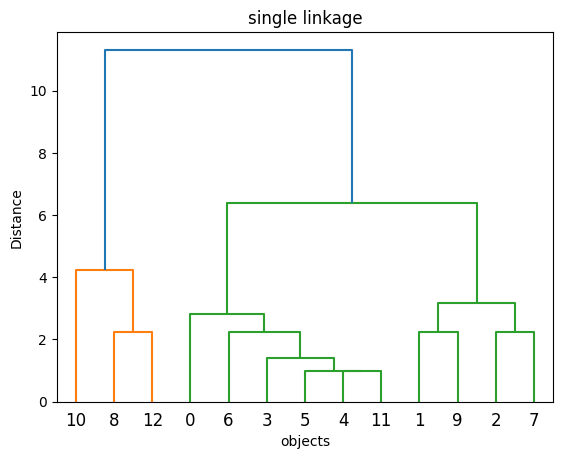

In [6]:
dendrogram_plot = dendrogram(linkage(df, method='single'))
plt.title('single linkage' )
plt.xlabel('objects')
plt.ylabel('Distance')
plt.show()

Compute a dendrogram with complete linkage

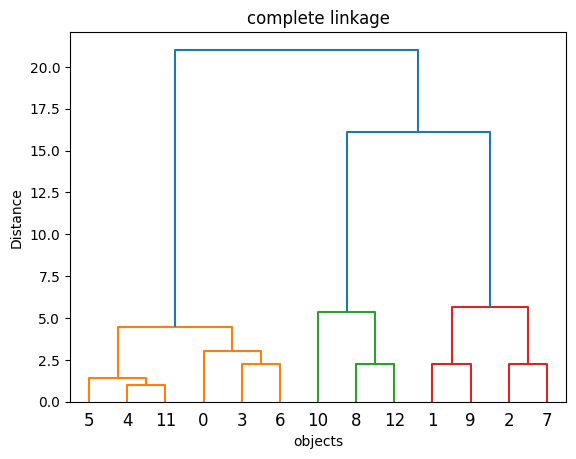

In [7]:
dendrogram_plot = dendrogram(linkage(df, method='complete'))
plt.title('complete linkage' )
plt.xlabel('objects')
plt.ylabel('Distance')
plt.show()

Compute a dendrogram with average linkage

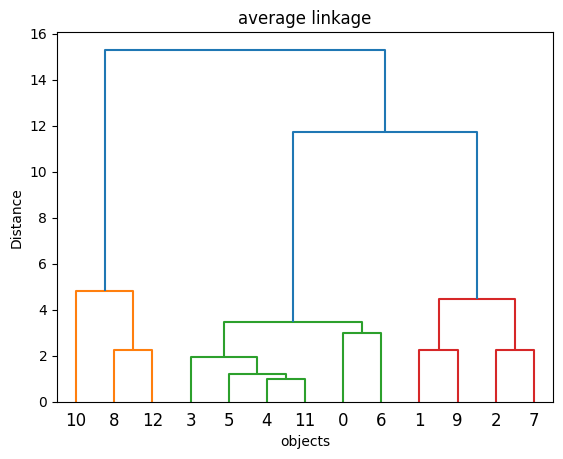

In [8]:
dendrogram_plot = dendrogram(linkage(df, method='average'))
plt.title('average linkage' )
plt.xlabel('objects')
plt.ylabel('Distance')
plt.show()

Compute a dendrogram with centroid linkage

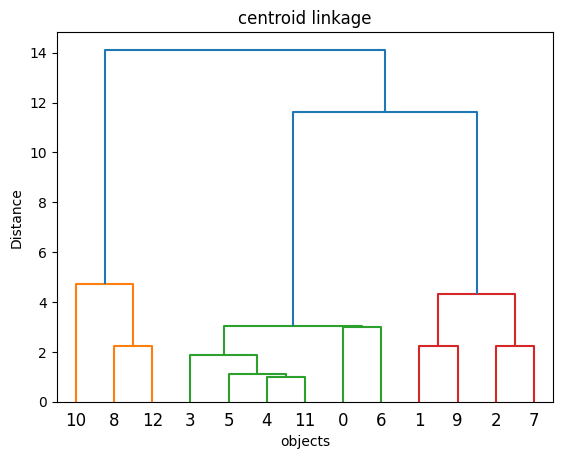

In [9]:
dendrogram_plot = dendrogram(linkage(df, method='centroid'))
plt.title('centroid linkage' )
plt.xlabel('objects')
plt.ylabel('Distance')
plt.show()

Compute a dendrogram with Ward's linkage

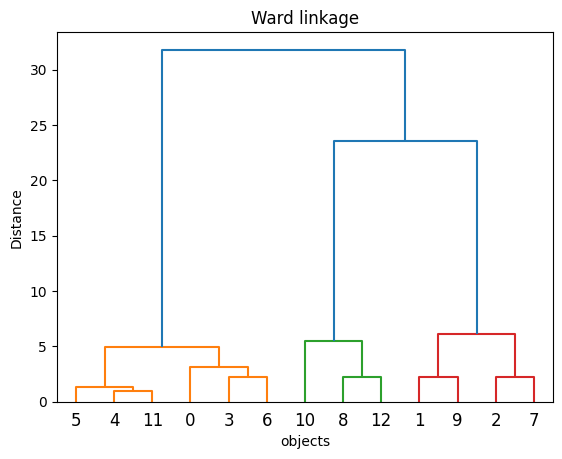

In [10]:
dendrogram_plot = dendrogram(linkage(df, method='ward'))
plt.title('Ward linkage' )
plt.xlabel('objects')
plt.ylabel('Distance')
plt.show()

Compute a dendrogram with average linkage and other options

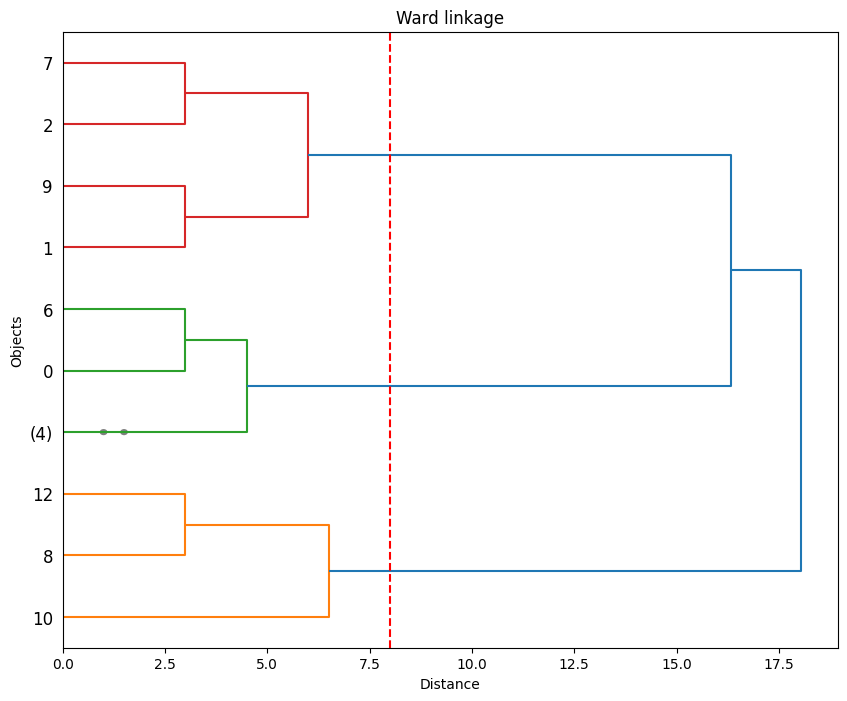

In [11]:
# run linkage
linkward = linkage(df, 
                   metric = 'cityblock', # cityblock or Manhattan dissimilarity for the dissimilarity matrix
                   method='average') # you may compare with other methods except 'centroid' and 'ward' which will only run only with euclidean distances.

# run dendrogram
plt.figure(figsize=(10, 8))
dendrogram_plot = dendrogram(linkward, 
                            truncate_mode='lastp',  # show only the last p merged clusters - important when there have too many objects
                            p=10,  # p merged clusters to show 
                            leaf_font_size=12.,
                            show_contracted=True,  # to get a distribution impression in truncated branches
                            orientation='right') # orientation 90º right
plt.title('Ward linkage')
plt.xlabel('Distance')
plt.ylabel('Objects')

# draw a vertical line that sets the number and cluster composition by considering a maximum distance of 8 (x=8)
plt.axvline(x=8, color='r', linestyle='--')

We may want to visualize the clusters in a scatter plot.

Now we will use the `AgglomerativeClustering()` function of `sklear.cluster` that generates labels for each object (row in the DataFrame df) by defining the number of clusters we are interested on.


In [12]:
# run cluster analysis and define 3 clusters (equivalent to the clusters defined by the horizontal line in the previous dendrogram)
cluster3 = AgglomerativeClustering(n_clusters=3, # We are interested in only 3 clusters
                                    metric='manhattan', # equivalent to 'cityblock'
                                    linkage='average')
cluster3.fit_predict(df)
group3_labels = cluster3.labels_
group3_labels # labels of each group of objects (each line in df)

array([2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0])

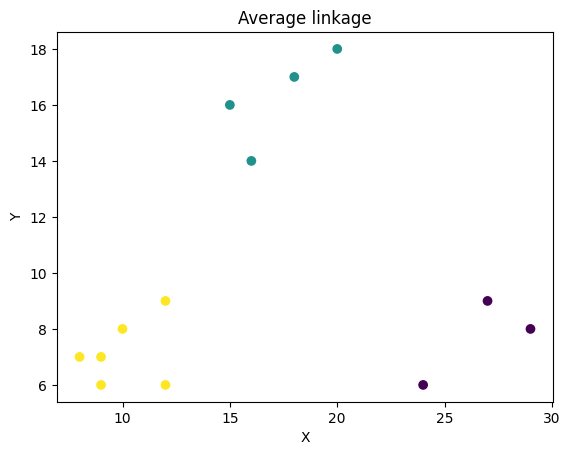

In [13]:
plt.scatter(df['X'], df['Y'], c=group3_labels)
plt.title('Average linkage' )
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

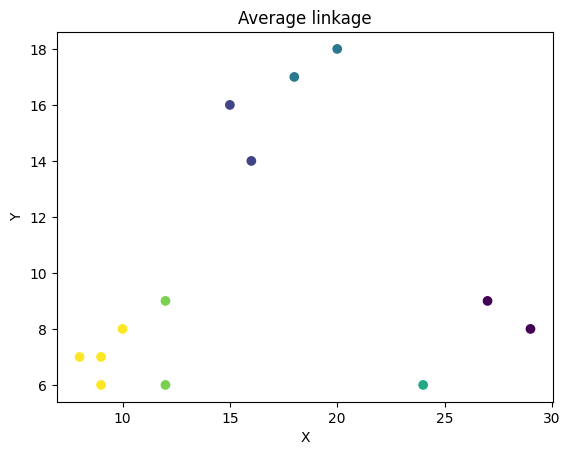

In [14]:
# The same but now considering 6 clusters
cluster6 = AgglomerativeClustering(n_clusters=6, 
                                    metric='manhattan', # equivalent to 'cityblock'
                                    linkage='average')
cluster6.fit_predict(df)
group6_labels = cluster6.labels_
plt.scatter(df['X'], df['Y'], c=group6_labels)
plt.title('Average linkage' )
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Plot a heatmap with dendrogram by clustering rows using average linkage
The `Seaborn` module has an interesing visualization tool that help visualizing variable patterns and dissimilarities among objects in large datasets. It plots a heatplot combined with a dendrogram using a user defined linkage method, either to group objects (rows) or variables (columns).

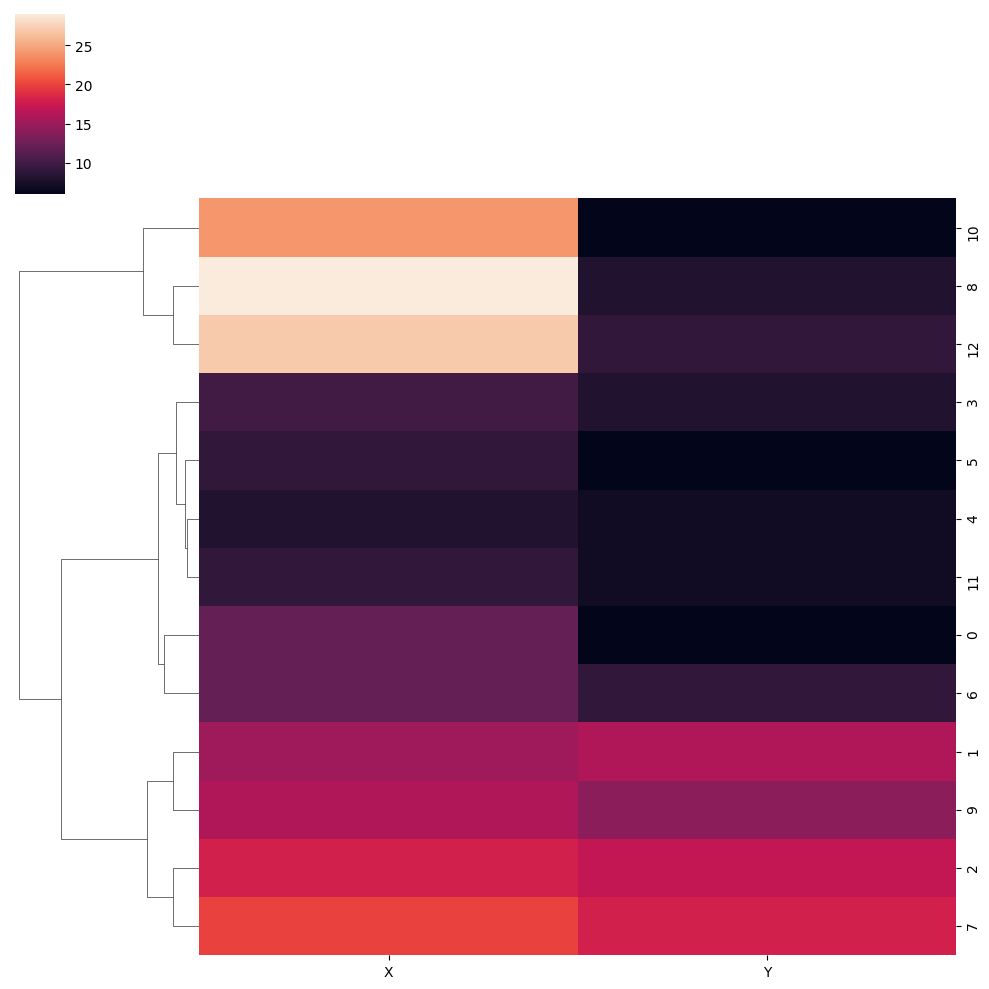

In [15]:
sns.clustermap(df, col_cluster=False, row_cluster=True, method='average')
plt.show()

#### Example with the red wine quality dataset

Let's try to group red wines according to their characteristics and check if these groups are somehow related with the perceived quality by experts.

In [16]:
df_wine = pd.read_csv('winequality_red.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Select only variables of interest (related with wine characteristics - remove `quality`)

In [17]:
df = df_wine.iloc[:, 0:11]

Run an agglomerative cluster analysis based on Ward's method

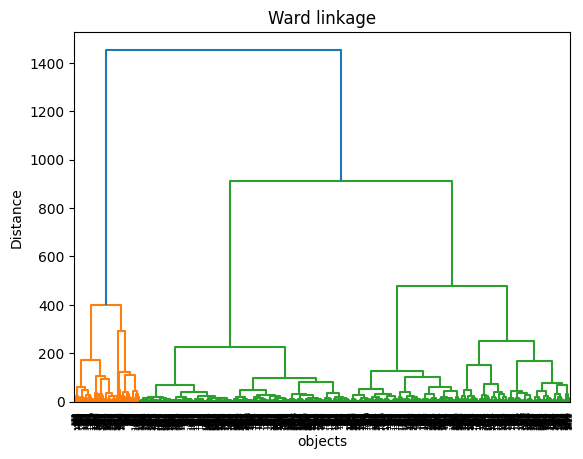

In [18]:
dendrogram_plot = dendrogram(linkage(df, method='ward'))
plt.title('Ward linkage' )
plt.xlabel('objects')
plt.ylabel('Distance')
plt.show()

We would need to increase a lot the plot window to identify each wine in the dendrogram. But we can rotate the dendrogram and show fewer merged clusters.

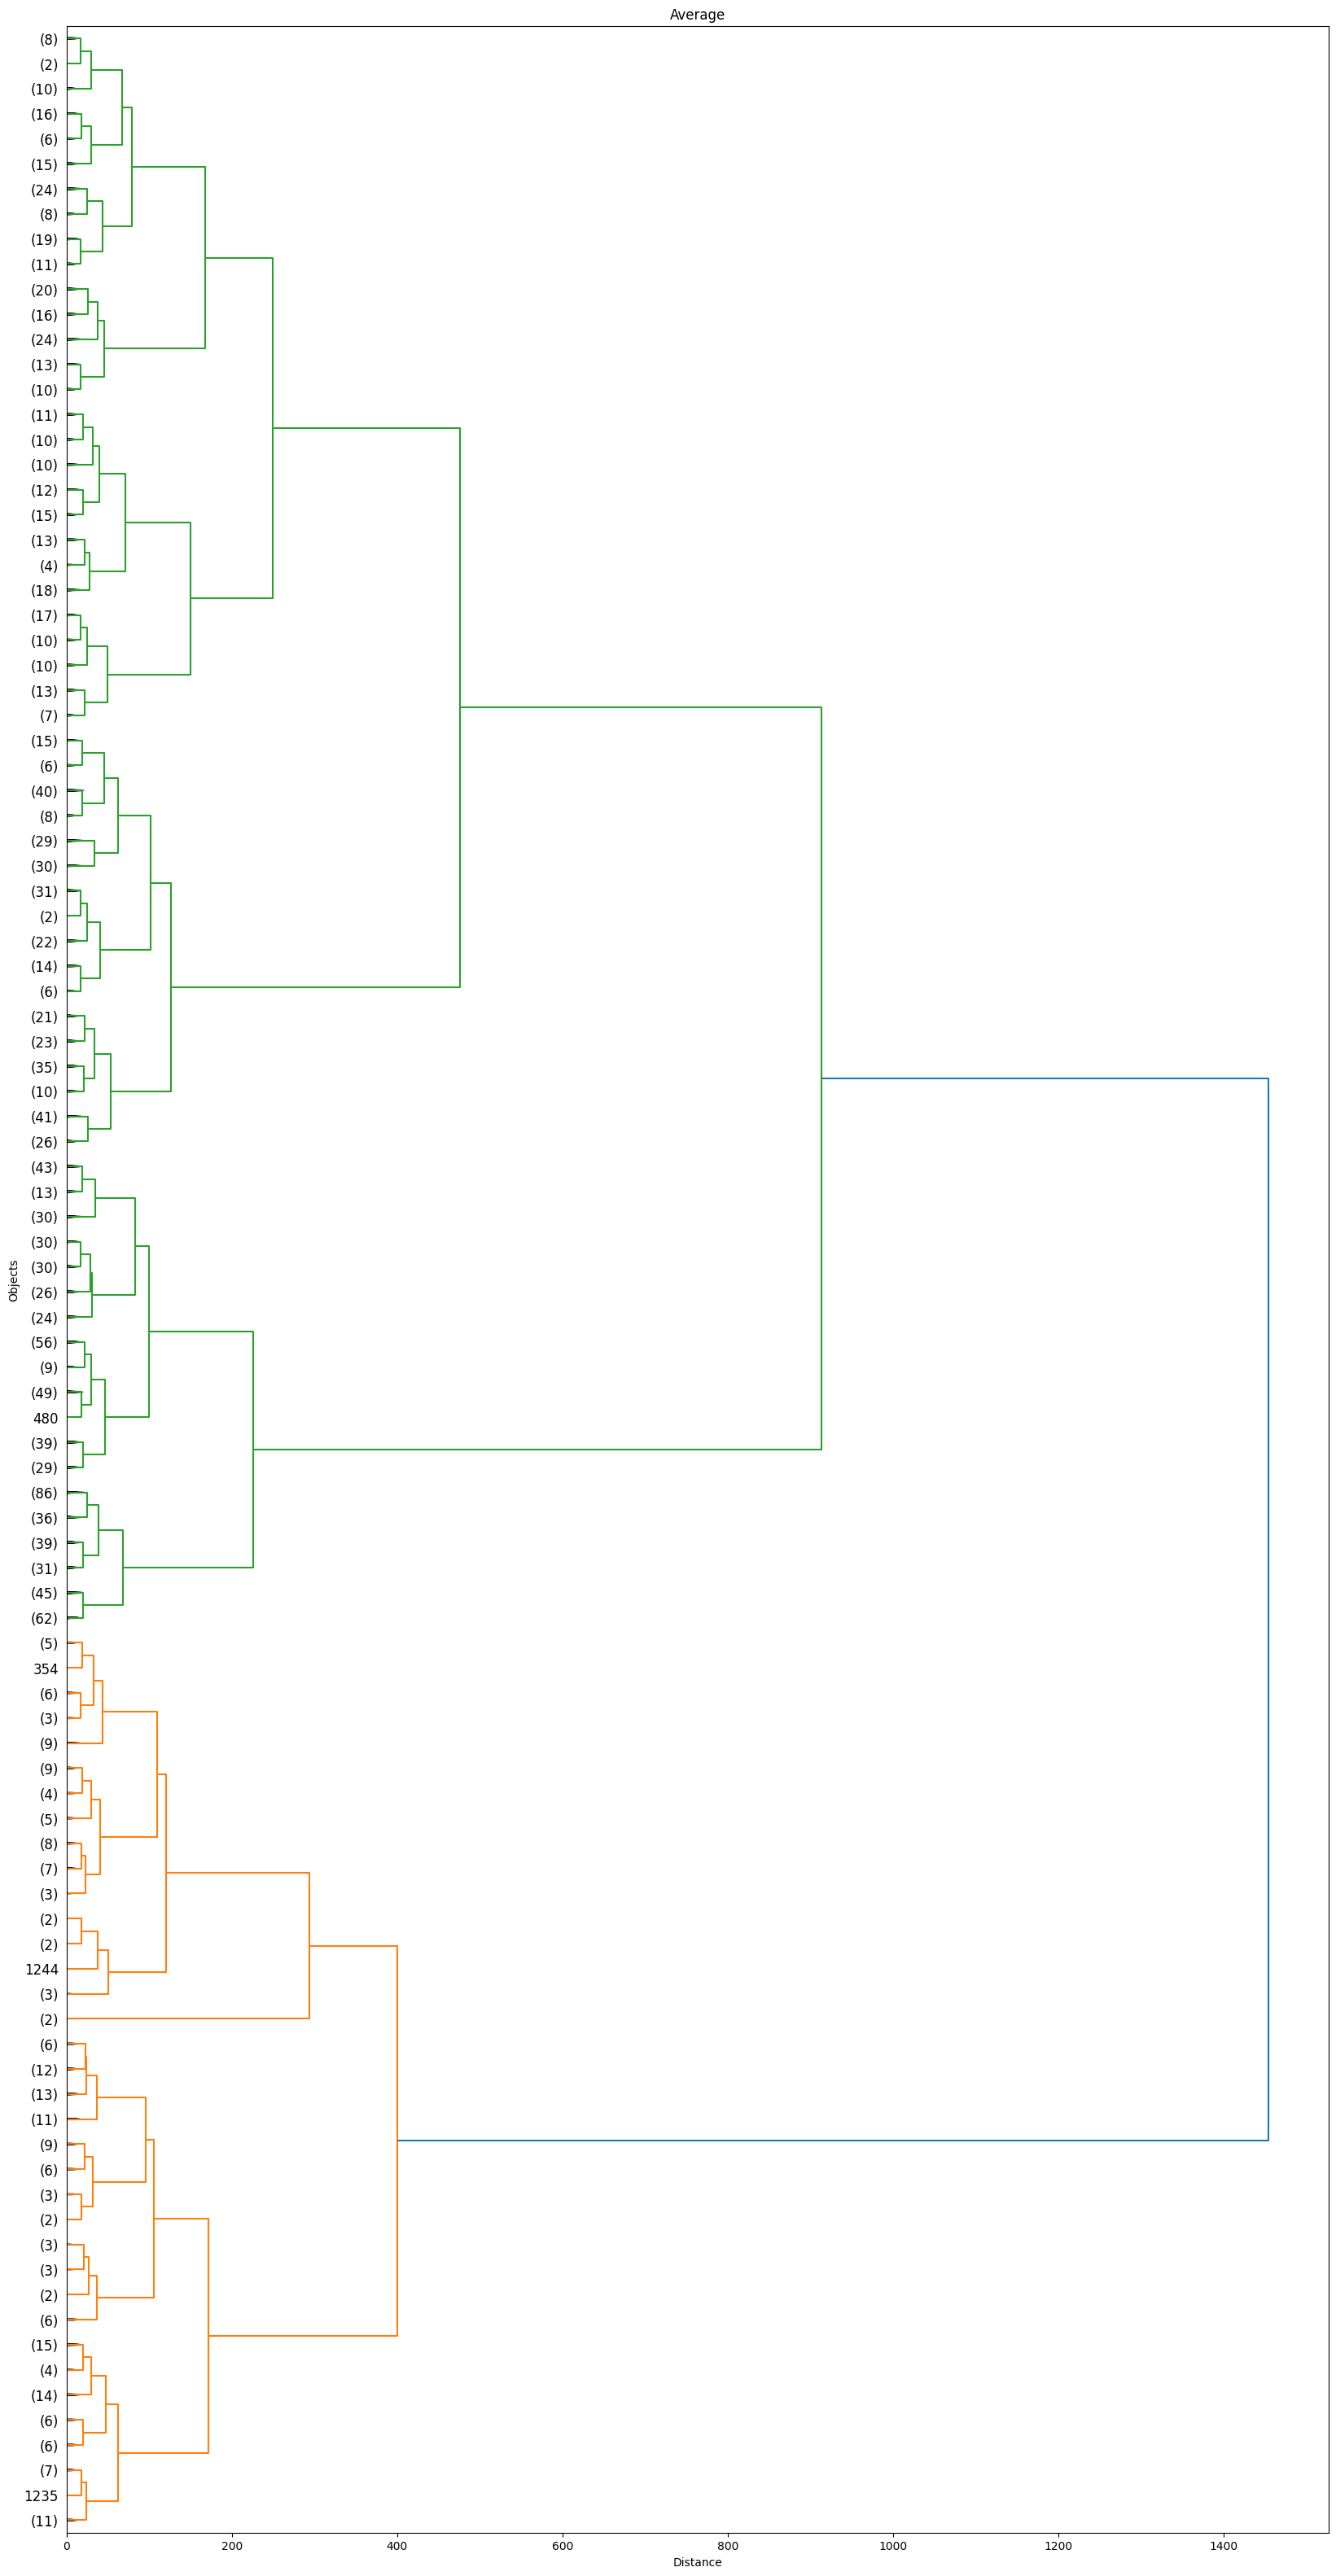

In [19]:
clust_link = linkage(df, 
                   metric = 'euclidean',
                   method='ward')

# run dendrogram
plt.figure(figsize=(20, 40))
dendrogram_plot = dendrogram(clust_link, 
                            truncate_mode='lastp',  # show only the last p merged clusters - important when there are too many objects
                            p=100,  # p merged clusters to show 
                            leaf_font_size=12.,
                            show_contracted=True,  # to get a distribution impression in truncated branches
                            orientation='right') # orientation 90º right
plt.title('Average' )
plt.xlabel('Distance')
plt.ylabel('Objects')
plt.show()


Now let's plot a dendrogram combined with a heatmap plot to check which variables might be more related with groupds.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


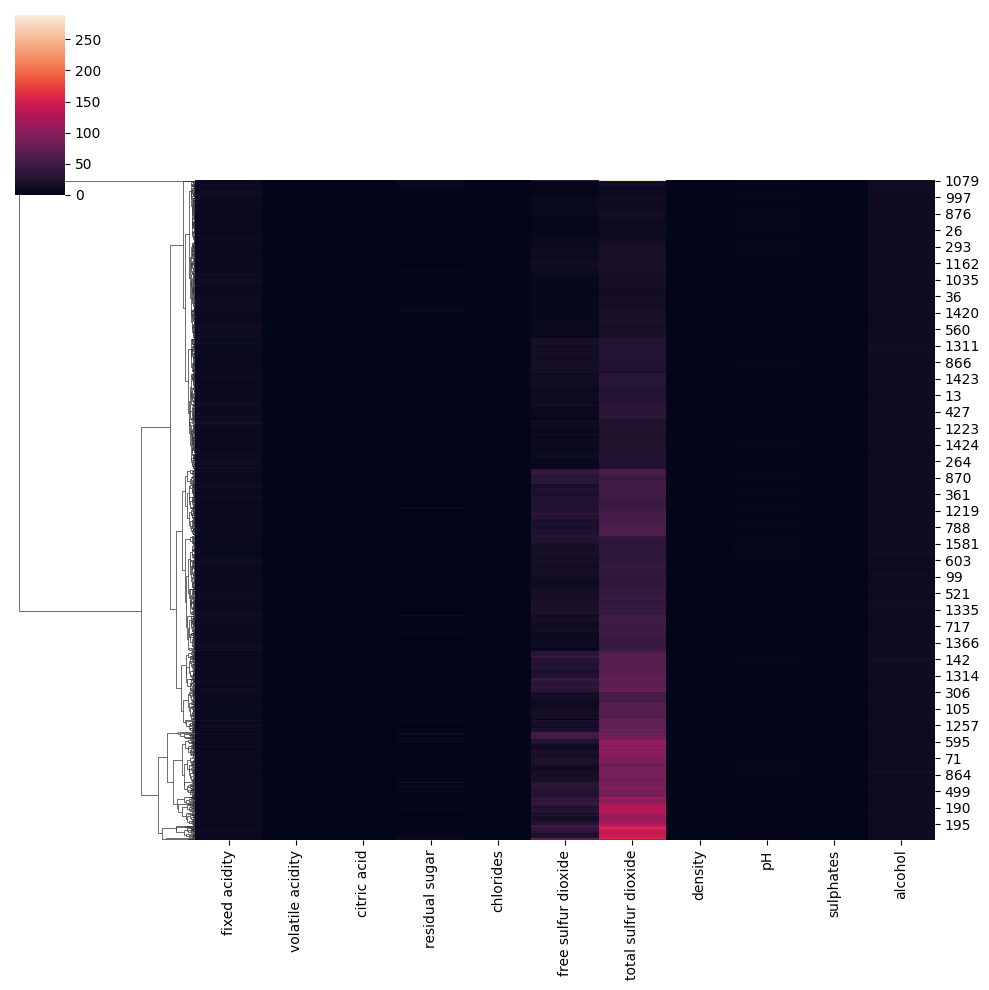

In [20]:
sns.clustermap(df, col_cluster=False, row_cluster=True, method='average')
plt.show()

This clustering has a problem: each variable has different scales which hides the variability for most variables. Features with high ranges will have a bigger influence on the clustering. Therefore, standardization is required before building a clustering model, for example using `StandardScaler` function from `sklearn`


In [21]:
from sklearn.preprocessing import StandardScaler

wine_scaled = StandardScaler().fit_transform(df)
# As a result, we obtained a two-dimensional NumPy array. We can convert it to a pandas DataFrame for a better display.
df_scaled = pd.DataFrame(data=wine_scaled, columns=df.columns)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


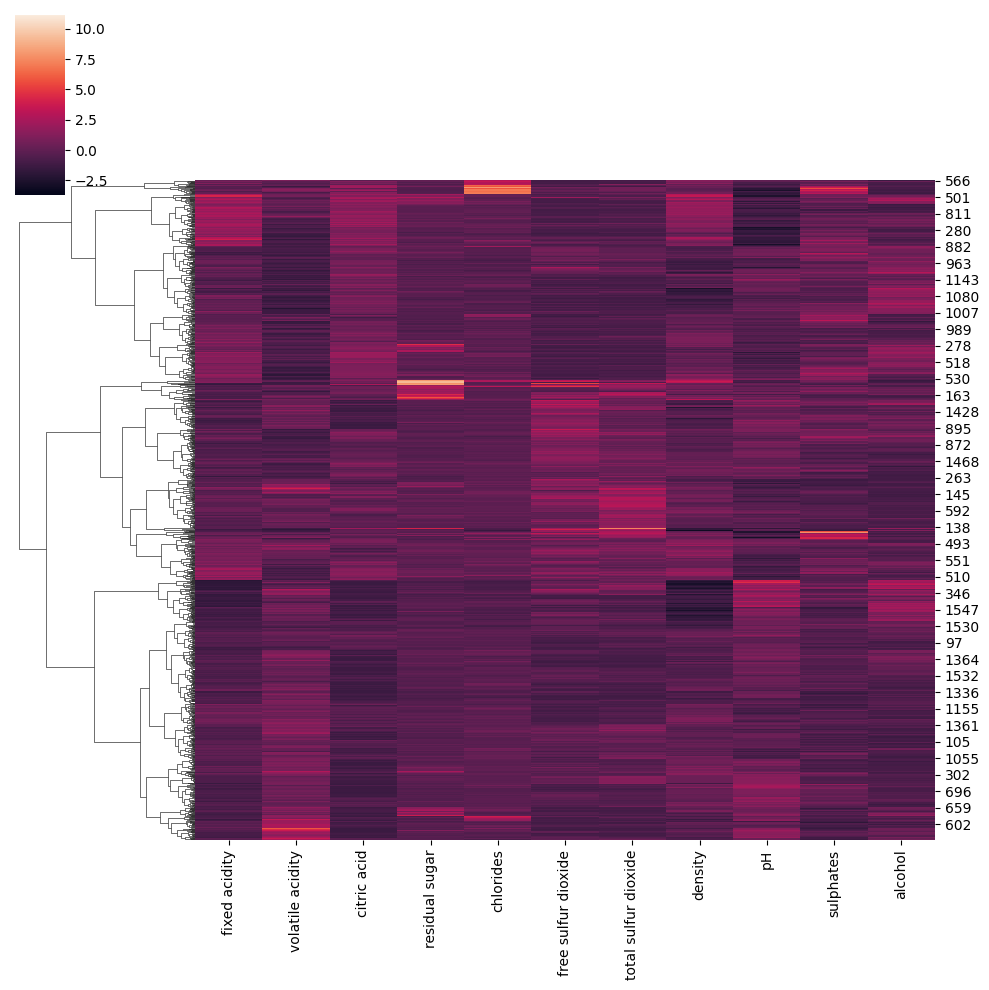

In [22]:
sns.clustermap(df_scaled, col_cluster=False, row_cluster=True, method='ward')
plt.show()

We can check if the clusters that were defined have anything to do with the 10 classes of wine quality. Based on the dendrogram, We will define 5 wine clusters based on their characteristics.

In [23]:
# run cluster analysis and define 5 clusters
cluster5 = AgglomerativeClustering(n_clusters=5, 
                                    metric='euclidean',
                                    linkage='ward')
cluster5.fit_predict(df_scaled)
cluster5_labels = cluster5.labels_
cluster5_labels # labels of each group of objects (each line in df)

array([1, 1, 1, ..., 2, 2, 0])

In [24]:
# Crosstabulate wine quality with the formed clusters
mydict2 = {'quality': df_wine['quality'], 'label': cluster5_labels}
mydf = pd.DataFrame(mydict2)

cross_df = pd.crosstab(index=mydict2['quality'], columns=mydict2['label'])
print(cross_df)

col_0      0    1    2   3   4
quality                       
3          1    7    1   1   0
4          6   34    8   1   4
5         91  278  270  17  25
6        208  191  177  13  49
7        132   20   28   1  18
8         14    0    1   0   3


<Axes: xlabel='col_0', ylabel='quality'>

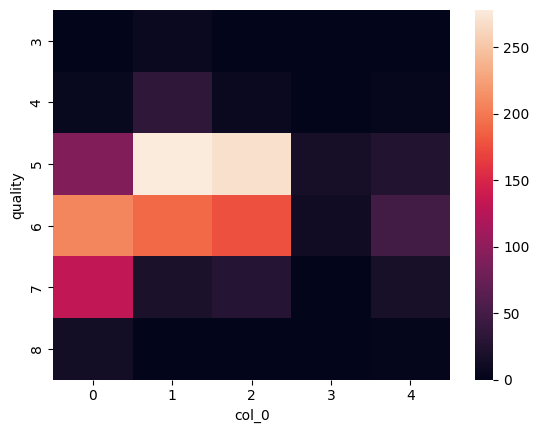

In [25]:
# Plot the crosstable using a heatmap
sns.heatmap(cross_df)

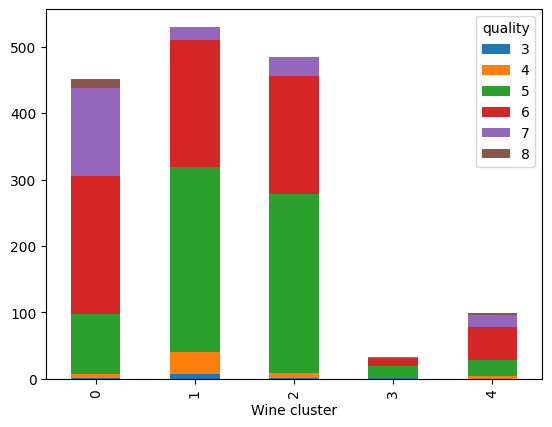

In [26]:
# Plot the crosstable using a bar plot
pd.crosstab(index=mydict2['label'], columns=mydict2['quality']).plot(kind='bar', stacked=True)
plt.xlabel("Wine cluster")
plt.show()

## Divisive Cluster Analysis (DIANA)

Another hierarchical clustering approach is the Divisive Hierarchical Cluster Analysis (DIANA), which is not so commonly used and, to our knowledge, it is not implemented in any python's module (but check e.g. here: https://github.com/div338/Divisive-Clustering-Analysis-Program-DIANA-/blob/master/divisive_clustering.py)

## References

An Introduction to Hierarchical Clustering in Python https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python

Hierarchical clustering. https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

SciPy Hierarchical Clustering and Dendrogram Tutorial. https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/